In [ ]:
!git clone https://github.com/SUWAANsilveroak/A-B-Testing.git

%cd A-B-Testing


Cloning into 'A-B-Testing'...
remote: Enumerating objects: 17, done.
remote: Counting objects: 100% (17/17), done.
remote: Compressing objects: 100% (11/11), done.
remote: Total 17 (delta 5), reused 13 (delta 4), pack-reused 0 (from 0)
Receiving objects: 100% (17/17), 57.57 KiB | 14.39 MiB/s, done.
Resolving deltas: 100% (5/5), done.
/content/A-B-Testing/A-B-Testing


In [ ]:
import pandas as pd                                       # For data manipulation and analysis, including working with DataFrames.
import matplotlib.pyplot as plt                           # For creating static, interactive, and animated visualizations.
import seaborn as sns                                     # For advanced data visualization with a focus on statistical graphics.
import numpy as np                                        # For numerical operations and handling arrays/matrices.
import warnings                                           # For managing and suppressing warning messages.
warnings.filterwarnings('ignore')                         # Ignore all warnings to reduce output clutter during execution.


In [ ]:
main_df=pd.read_csv("marketing_campaign_data.csv")

In [ ]:
main_df.head()

,row_number,date,facebook_ad_campaign,facebook_ad_views,facebook_ad_clicks,facebook_ad_conversions,facebook_cost_per_ad,facebook_ctr,facebook_conversion_rate,facebook_cost_per_click,adword_ad_campaign,adword_ad_views,adword_ad_clicks,adword_ad_conversions,adword_cost_per_ad,adword_ctr,adword_conversion_rate,adword_cost_per_click
0,1,2024-11-24,FACEBOOK AD,3081,70,8,94,2.271990,11.428571,1.342857,ADWORD AD,3931,58,9,112,1.475452,15.517241,1.931034
1,2,2023-07-27,FACEBOOK AD,1135,51,13,207,4.493392,25.490196,4.058824,ADWORD AD,5093,57,8,101,1.119183,14.035088,1.771930
2,3,2022-08-09,FACEBOOK AD,3191,58,17,185,1.817612,29.310345,3.189655,ADWORD AD,5125,69,8,50,1.346341,11.594203,0.724638
3,4,2023-09-16,FACEBOOK AD,1177,71,19,68,6.032285,26.760563,0.957746,ADWORD AD,4892,54,5,137,1.103843,9.259259,2.537037
4,5,2022-05-07,FACEBOOK AD,2228,28,16,65,1.256732,57.142857,2.321429,ADWORD AD,5750,45,9,82,0.782609,20.000000,1.822222


In [ ]:
main_df.shape

(1000, 18)

In [ ]:
main_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   row_number                1000 non-null   int64  
 1   date                      1000 non-null   object 
 2   facebook_ad_campaign      1000 non-null   object 
 3   facebook_ad_views         1000 non-null   int64  
 4   facebook_ad_clicks        1000 non-null   int64  
 5   facebook_ad_conversions   1000 non-null   int64  
 6   facebook_cost_per_ad      1000 non-null   int64  
 7   facebook_ctr              1000 non-null   float64
 8   facebook_conversion_rate  1000 non-null   float64
 9   facebook_cost_per_click   1000 non-null   float64
 10  adword_ad_campaign        1000 non-null   object 
 11  adword_ad_views           1000 non-null   int64  
 12  adword_ad_clicks          1000 non-null   int64  
 13  adword_ad_conversions     1000 non-null   int64  
 14  adword_co

change date type and sort the data by date
change col names
round up float values

In [ ]:
df= main_df.copy()

In [ ]:
df.head()

,row_number,date,facebook_ad_campaign,facebook_ad_views,facebook_ad_clicks,facebook_ad_conversions,facebook_cost_per_ad,facebook_ctr,facebook_conversion_rate,facebook_cost_per_click,adword_ad_campaign,adword_ad_views,adword_ad_clicks,adword_ad_conversions,adword_cost_per_ad,adword_ctr,adword_conversion_rate,adword_cost_per_click
0,1,2024-11-24,FACEBOOK AD,3081,70,8,94,2.271990,11.428571,1.342857,ADWORD AD,3931,58,9,112,1.475452,15.517241,1.931034
1,2,2023-07-27,FACEBOOK AD,1135,51,13,207,4.493392,25.490196,4.058824,ADWORD AD,5093,57,8,101,1.119183,14.035088,1.771930
2,3,2022-08-09,FACEBOOK AD,3191,58,17,185,1.817612,29.310345,3.189655,ADWORD AD,5125,69,8,50,1.346341,11.594203,0.724638
3,4,2023-09-16,FACEBOOK AD,1177,71,19,68,6.032285,26.760563,0.957746,ADWORD AD,4892,54,5,137,1.103843,9.259259,2.537037
4,5,2022-05-07,FACEBOOK AD,2228,28,16,65,1.256732,57.142857,2.321429,ADWORD AD,5750,45,9,82,0.782609,20.000000,1.822222


In [ ]:
# Renames columns for clearer and more concise names for easier reference
df = df.rename(columns={'date':'date_of_campaign',
                        'facebook_ad_campaign':'fb_ad_campaign',
                        'facebook_ad_views':'fb_ad_views',
                        'facebook_ad_clicks':'fb_ad_clicks',
                        'facebook_ad_conversions':'fb_ad_conversions',
                        'facebook_cost_per_ad':'fb_cost_per_ad($)',
                        'facebook_ctr':'fb_ctr(%)',
                        'facebook_conversion_rate':'fb_conversion_rate(%)',
                        'facebook_cost_per_click':'fb_cost_per_click($)',
                        'adword_ad_campaign':'aw_ad_campaign',
                        'adword_ad_views':'aw_ad_views',
                        'adword_ad_clicks':'aw_ad_clicks',
                        'adword_ad_conversions':'aw_ad_conversions',
                        'adword_cost_per_ad':'aw_cost_per_ad($)',
                        'adword_ctr':'aw_ctr(%)',
                        'adword_conversion_rate':'aw_conversion_rate(%)',
                        'adword_cost_per_click':'aw_cost_per_click($)',
                       })

# Converts the 'date' column to datetime format, ensuring proper handling of date values
df['date_of_campaign'] = pd.to_datetime(df['date_of_campaign'])

# Rounds all numeric values in the DataFrame to 2 decimal places for cleaner presentation
df = df.round(2)

# Drops the 'row_number' column from the DataFrame
df = df.drop('row_number', axis=1)

# Sorts the DataFrame by the 'date' column in ascending order, placing the oldest date at the top
df = df.sort_values(by='date_of_campaign', ascending=True)

# reset the row numbers after sort operation
df = df.reset_index(drop=True)

In [ ]:
df.head()

,date_of_campaign,fb_ad_campaign,fb_ad_views,fb_ad_clicks,fb_ad_conversions,fb_cost_per_ad($),fb_ctr(%),fb_conversion_rate(%),fb_cost_per_click($),aw_ad_campaign,aw_ad_views,aw_ad_clicks,aw_ad_conversions,aw_cost_per_ad($),aw_ctr(%),aw_conversion_rate(%),aw_cost_per_click($)
0,2021-12-22,FACEBOOK AD,3172,62,14,141,1.95,22.58,2.27,ADWORD AD,5754,64,9,177,1.11,14.06,2.77
1,2021-12-24,FACEBOOK AD,3211,38,9,186,1.18,23.68,4.89,ADWORD AD,4954,73,6,54,1.47,8.22,0.74
2,2021-12-25,FACEBOOK AD,1936,53,15,66,2.74,28.30,1.25,ADWORD AD,4702,38,9,187,0.81,23.68,4.92
3,2021-12-25,FACEBOOK AD,1194,45,9,71,3.77,20.00,1.58,ADWORD AD,3718,58,3,161,1.56,5.17,2.78
4,2021-12-26,FACEBOOK AD,2479,44,12,174,1.77,27.27,3.95,ADWORD AD,5562,63,4,162,1.13,6.35,2.57


In [ ]:
# Checking null values
df.isnull().sum()

,0
date_of_campaign,0
fb_ad_campaign,0
fb_ad_views,0
fb_ad_clicks,0
fb_ad_conversions,0
fb_cost_per_ad($),0
fb_ctr(%),0
fb_conversion_rate(%),0
fb_cost_per_click($),0
aw_ad_campaign,0


In [ ]:
# Check for duplicate dates in the 'date' column
duplicate_dates = df[df['date_of_campaign'].duplicated()]

# Print the rows with duplicate dates
duplicate_dates.head()

,date_of_campaign,fb_ad_campaign,fb_ad_views,fb_ad_clicks,fb_ad_conversions,fb_cost_per_ad($),fb_ctr(%),fb_conversion_rate(%),fb_cost_per_click($),aw_ad_campaign,aw_ad_views,aw_ad_clicks,aw_ad_conversions,aw_cost_per_ad($),aw_ctr(%),aw_conversion_rate(%),aw_cost_per_click($)
3,2021-12-25,FACEBOOK AD,1194,45,9,71,3.77,20.00,1.58,ADWORD AD,3718,58,3,161,1.56,5.17,2.78
7,2021-12-30,FACEBOOK AD,1598,29,12,216,1.81,41.38,7.45,ADWORD AD,3745,47,4,120,1.26,8.51,2.55
12,2022-01-08,FACEBOOK AD,2450,33,6,194,1.35,18.18,5.88,ADWORD AD,4770,34,5,193,0.71,14.71,5.68
26,2022-01-27,FACEBOOK AD,2024,70,17,140,3.46,24.29,2.00,ADWORD AD,4213,71,9,134,1.69,12.68,1.89
27,2022-01-27,FACEBOOK AD,1928,58,10,60,3.01,17.24,1.03,ADWORD AD,4133,66,7,131,1.60,10.61,1.98


In [55]:
# Statistical analysis
df.describe().T

,count,mean,min,25%,50%,75%,max,std
date_of_campaign,1000,2023-07-04 07:13:26.399999744,2021-12-22 00:00:00,2022-10-07 18:00:00,2023-07-20 12:00:00,2024-03-24 00:00:00,2024-12-20 00:00:00,NaN
fb_ad_views,1000.0,2152.031,1050.0,1600.25,2123.5,2706.25,3320.0,661.982166
fb_ad_clicks,1000.0,44.196,15.0,30.0,44.5,58.0,73.0,16.833328
fb_ad_conversions,1000.0,11.975,5.0,8.0,12.0,16.0,19.0,4.298471
fb_cost_per_ad($),1000.0,156.61,60.0,110.0,156.0,205.0,250.0,54.918904
fb_ctr(%),1000.0,2.28316,0.49,1.3675,2.07,2.9225,6.86,1.2067
fb_conversion_rate(%),1000.0,32.69608,6.85,18.0525,27.12,41.88,118.75,20.570796
fb_cost_per_click($),1000.0,4.3105,0.96,2.3375,3.6,5.61,16.53,2.751582
aw_ad_views,1000.0,4771.438,3715.0,4258.25,4808.5,5300.75,5754.0,598.647684
aw_ad_clicks,1000.0,60.128,31.0,45.0,60.0,75.0,89.0,17.047822


In [ ]:
df.isnull().sum()

,0
date_of_campaign,0
fb_ad_campaign,0
fb_ad_views,0
fb_ad_clicks,0
fb_ad_conversions,0
fb_cost_per_ad($),0
fb_ctr(%),0
fb_conversion_rate(%),0
fb_cost_per_click($),0
aw_ad_campaign,0


In [24]:
# Geting basic info for df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   date_of_campaign       1000 non-null   datetime64[ns]
 1   fb_ad_campaign         1000 non-null   object        
 2   fb_ad_views            1000 non-null   int64         
 3   fb_ad_clicks           1000 non-null   int64         
 4   fb_ad_conversions      1000 non-null   int64         
 5   fb_cost_per_ad($)      1000 non-null   int64         
 6   fb_ctr(%)              1000 non-null   float64       
 7   fb_conversion_rate(%)  1000 non-null   float64       
 8   fb_cost_per_click($)   1000 non-null   float64       
 9   aw_ad_campaign         1000 non-null   object        
 10  aw_ad_views            1000 non-null   int64         
 11  aw_ad_clicks           1000 non-null   int64         
 12  aw_ad_conversions      1000 non-null   int64         
 13  aw_c

In [54]:
# Lets check Total cost Vs Total Coversion between Facebook and Google Adword
pd.DataFrame([[df['fb_cost_per_ad($)'].sum(),
               df["fb_ad_conversions"].sum(),
               df['fb_cost_per_ad($)'].sum(),
               df['aw_ad_conversions'].sum()]],
              columns=['FB Ad Cost','FB Conversion','AW ad cost','AW coversion'])

,FB Ad Cost,FB Conversion,AW ad cost,AW coversion
0,156610,11975,156610,5933


### Findings
Facebook ads and Adword ads cost the same but the conversion rate is higher in facebook


In [58]:
Total_conversion = df['fb_ad_conversions'].sum() + df['aw_ad_conversions'].sum()
Total_conversion

17908

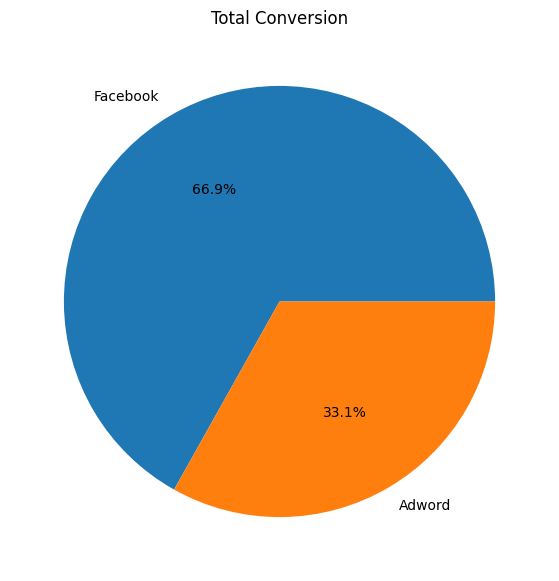

In [64]:
# Ploting the pie chart
plt.figure(figsize=(10,7))
'''
Below code is for pie chart with total conversion
'''
plt.pie([df['fb_ad_conversions'].sum(), df['aw_ad_conversions'].sum()],
        labels=['Facebook','Adword'],
        autopct='%1.1f%%'
        )
plt.title("Total Conversion")
plt.show()